# Regression

In [1]:
import pandas as pd

income_df = pd.read_csv('./data/Income2.csv')
display(income_df.info())
display(income_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Seniority  30 non-null     float64
 2   Income     30 non-null     float64
dtypes: float64(3)
memory usage: 848.0 bytes


None

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922


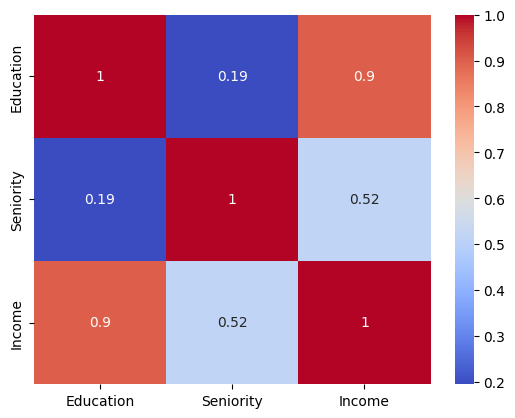

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

income_corr = income_df.corr()

sns.heatmap(income_corr, annot=True, cmap="coolwarm")
plt.show()

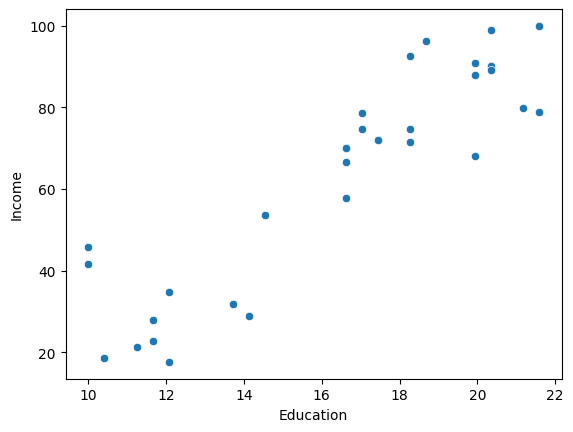

In [3]:
sns.scatterplot(x='Education', y='Income', data=income_df)
plt.show()

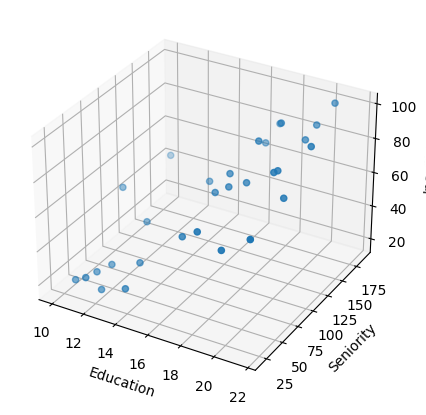

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'], income_df['Seniority'], income_df['Income'])
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()

In [5]:
import plotly.express as px

fig = px.scatter_3d(income_df, x='Education', y='Seniority', z='Income')
fig.show()

# Model & Notations

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 11)

def plot_line(y, color):
  y_ = eval(y)
  plt.plot(x, y_, label=f'y={y}', marker='o', markersize=5, color=color)
  plt.legend(loc='best')
  plt.xlabel('x')
  plt.ylabel('y')

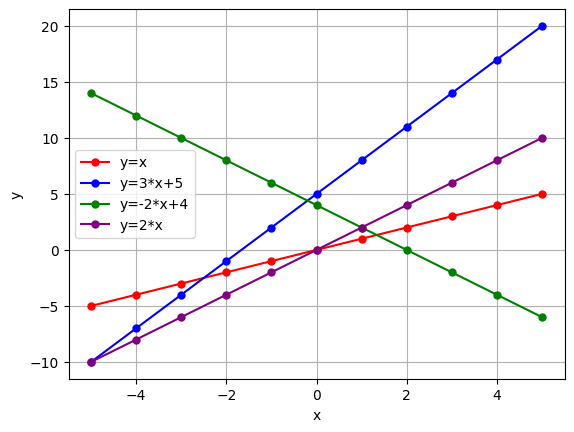

In [7]:
plot_line(y='x', color='red')
plot_line(y='3*x+5', color='blue')
plot_line(y='-2*x+4', color='green')
plot_line(y='2*x', color='purple')

plt.grid()
plt.show()

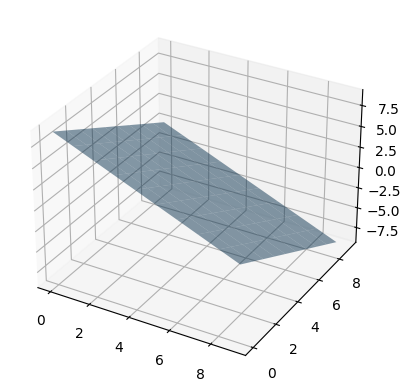

In [8]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

x1, x2 = np.meshgrid(range(10), range(10))

y_hat = 9 - x1 - x2

ax.plot_surface(x1, x2, y_hat, alpha=0.5)

plt.show()

# Performance Measures

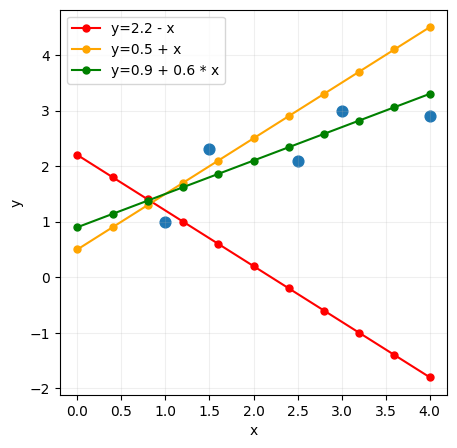

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame([
    [1, 1], 
    [1.5, 2.3], 
    [2.5, 2.1], 
    [3, 3], 
    [4, 2.9]
  ], columns=['x', 'y'])

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'], s=60)

# Plot lines
x = np.linspace(0, 4, 11)
plot_line(y='2.2 - x', color='red')
plot_line(y='0.5 + x', color='orange')
plot_line(y='0.9 + 0.6 * x', color='green')
ax.legend(loc='best')

ax.grid(alpha=0.2)
plt.show()

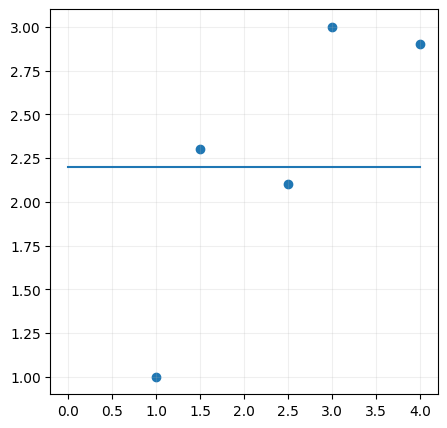

In [10]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

ax.grid(alpha=0.2)
plt.show()

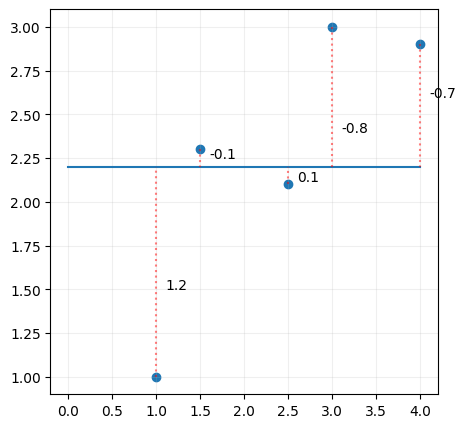

In [11]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

# Residuals
ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.2')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '-0.1')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.1')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '-0.8')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '-0.7')

ax.grid(alpha=0.2)
plt.show()

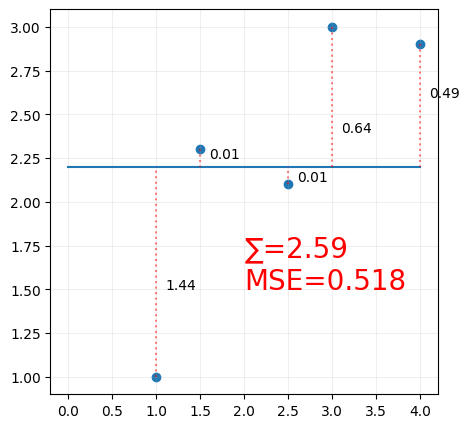

In [12]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = 0*x + 2.2
y_ = 0*df['x'] + 2.2

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y=2.25')

ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.44')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.01')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.01')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.64')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.49')

ax.text(2, 1.5, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

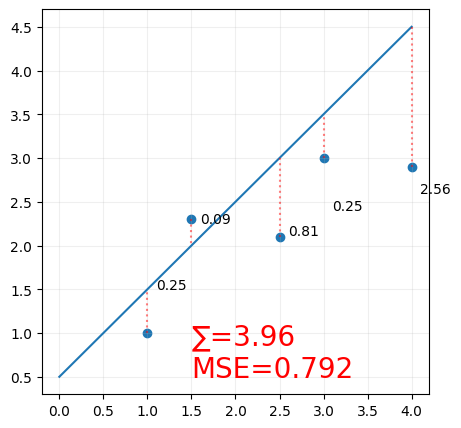

In [13]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = x + 0.5
y_ = df['x'] + 0.5

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y=0.5 + x')

ax.plot([1,1],[1, 1.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '0.25')
ax.plot([1.5,1.5],[2.3, 2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.09')
ax.plot([2.5,2.5],[2.1, 3], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.81')
ax.plot([3,3],[3, 3.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.25')
ax.plot([4,4],[2.9, 4.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '2.56')

ax.text(1.5, .5, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

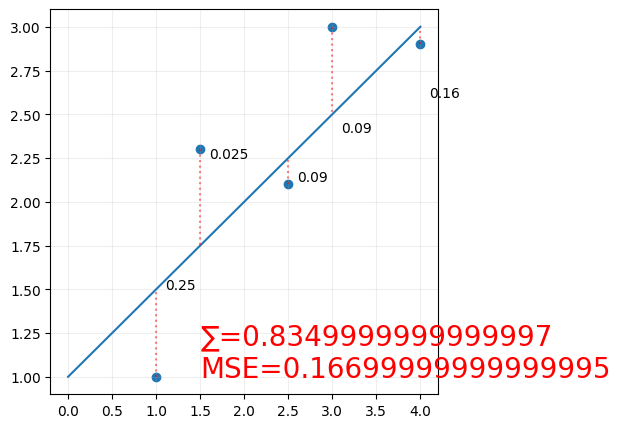

In [14]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = 0.5*x + 1
y_ = 0.5*df['x'] + 1

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y= 0.5x + 1')

ax.plot([1,1],[1, 1.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '0.25')
ax.plot([1.5,1.5],[2.3, 1.75], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.025')
ax.plot([2.5,2.5],[2.1, 2.25], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.09')
ax.plot([3,3],[3, 2.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.09')
ax.plot([4,4],[2.9, 3], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.16')

ax.text(1.5, 1, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

<img alt="cost function" src="assets/Surface-Plot-of-a-Two-Dimensional-Objective-Function.webp" width=600 />

> This is not the actual chart for this particular example

# Using Scikit-Learn

In [15]:
df = pd.DataFrame([
    [1, 1], 
    [1.5, 2.3], 
    [2.5, 2.1], 
    [3, 3], 
    [4, 2.9]
  ], columns=['x', 'y'])

df

,x,y
0,1.0,1.0
1,1.5,2.3
2,2.5,2.1
3,3.0,3.0
4,4.0,2.9


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['x']], df['y'])

print(model.coef_)
print(model.intercept_)

[0.55789474]
0.9210526315789476


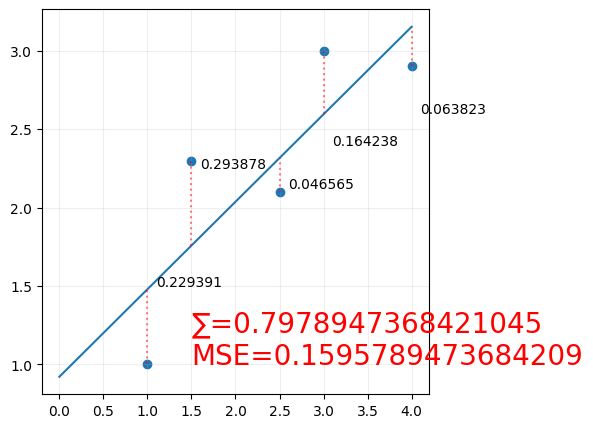

In [17]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = model.coef_[0]*x + model.intercept_
y_ = model.coef_[0]*df['x'] + model.intercept_

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y= {model.intercept_} + {model.coef_[0]}x')

ax.plot([1,1],[1, 1.478947], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '0.229391')
ax.plot([1.5,1.5],[2.3, 1.757895], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.293878')
ax.plot([2.5,2.5],[2.1, 2.315789], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.046565')
ax.plot([3,3],[3, 2.594737], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.164238')
ax.plot([4,4],[2.9, 3.152632], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.063823')

ax.text(1.5, 1, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

In [18]:
model.predict([[2]])

/Users/gilanyym/.local/share/virtualenvs/Sandbox-OAjSPVKB/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2.03684211])

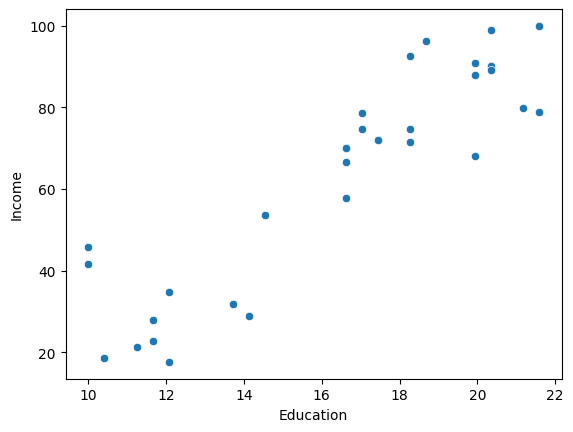

In [19]:
sns.scatterplot(x='Education', y='Income', data=income_df)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

income_model = LinearRegression()
income_model.fit(income_df[['Education']], income_df['Income'])

print(income_model.coef_, income_model.intercept_)

[6.38716122] -41.91661220978743


/Users/gilanyym/.local/share/virtualenvs/Sandbox-OAjSPVKB/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



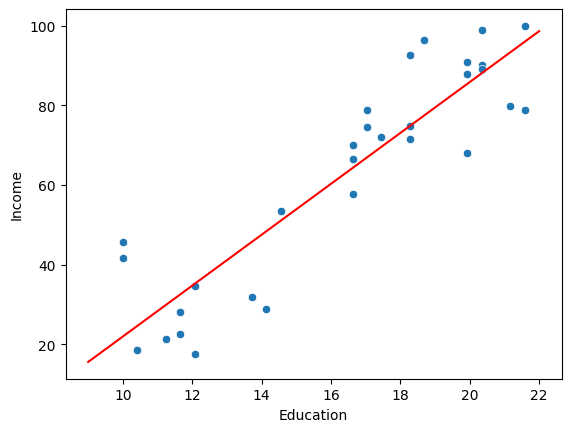

In [21]:
sns.scatterplot(x='Education', y='Income', data=income_df)

x = np.linspace(9, 22, 5)
y = income_model.predict(x.reshape(-1,1))

plt.plot(x, y, color="red")

plt.show()

In [22]:
income_model.predict([[15]])

/Users/gilanyym/.local/share/virtualenvs/Sandbox-OAjSPVKB/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([53.89080605])

# Scikit-Learn - Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

income_model = LinearRegression()
income_model.fit(income_df[['Education', 'Seniority']], income_df['Income'])

print(income_model.coef_, income_model.intercept_)

[5.89555596 0.17285547] -50.08563875473381


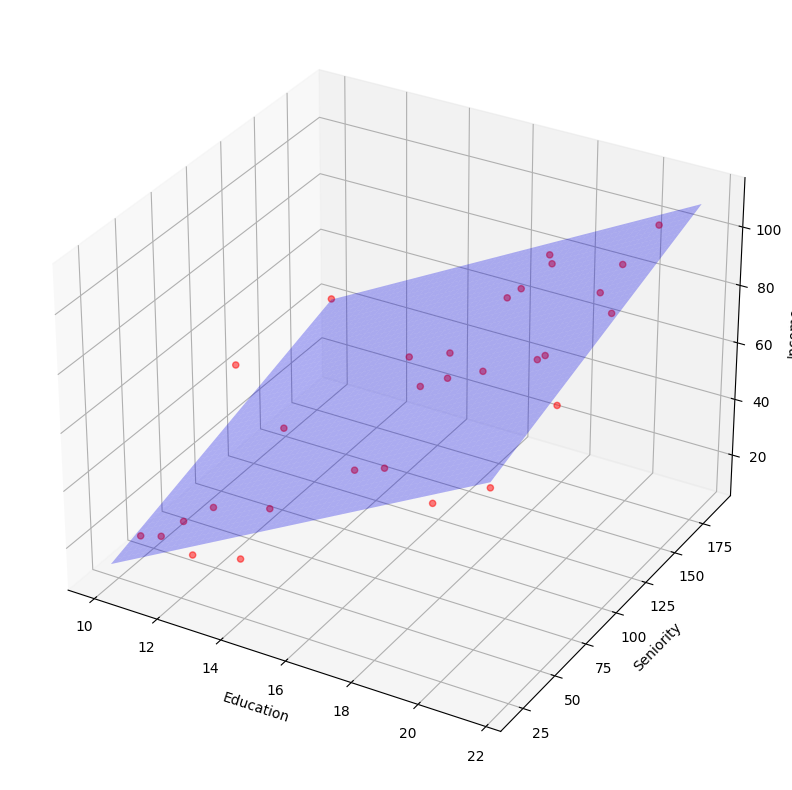

In [24]:
## Prepare the data for Visualization
import numpy as np

x_surf, y_surf = np.meshgrid(
  np.linspace(income_df.Education.min(), income_df.Education.max(), 100),
  np.linspace(income_df.Seniority.min(), income_df.Seniority.max(), 100)
)
surfaceX = pd.DataFrame({'Education': x_surf.ravel(), 'Seniority': y_surf.ravel()})
predictedIncomeForSurface=income_model.predict(surfaceX)

## convert the predicted result in an array
predictedIncomeForSurface=np.array(predictedIncomeForSurface)
# predictedIncomeForSurface

# Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'],income_df['Seniority'],income_df['Income'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predictedIncomeForSurface.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()

# Polynomial Regression

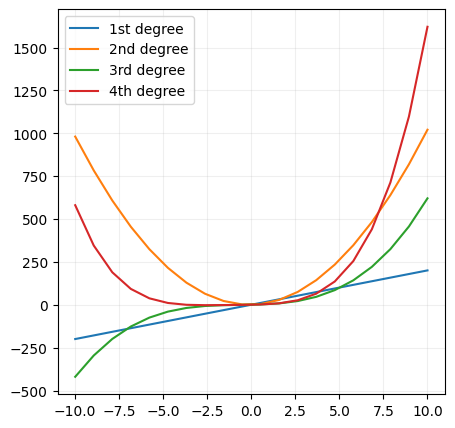

In [25]:
x = np.linspace(-10, 10, 20)
first_degreee_y = 20*x + 1
second_degree_y = 10*x**2 + 2*x + 1
third_degree_y = 0.5*x**3 + x**2 + 2*x + 1
fourth_degree_y = 0.1*x**4 + 0.5*x**3 + x**2 + 2*x + 1
# visualize the data with different polynomial degrees
f, ax = plt.subplots(figsize=(5,5))
ax.plot(x,first_degreee_y, label='1st degree')
ax.plot(x,second_degree_y, label='2nd degree')
ax.plot(x,third_degree_y, label='3rd degree')
ax.plot(x,fourth_degree_y, label='4th degree')
ax.legend()
ax.grid(alpha=0.2)
plt.show()


In [26]:
income2_df = pd.read_csv('./data/position_salaries.csv')
income2_df.head()

,Position,Level,Salary
0,Business Analyst,1.0,45000
1,Junior Consultant,2.0,50000
2,Senior Consultant,3.0,60000
3,Manager,4.0,80000
4,Country Manager,5.0,110000


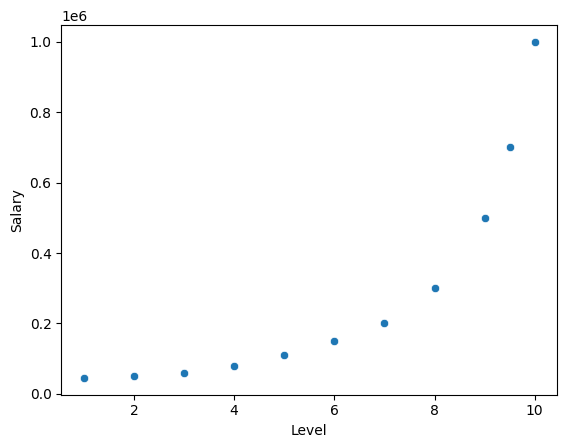

In [27]:
sns.scatterplot(x="Level", y="Salary", data=income2_df)
plt.show()

In [28]:
income2_model_linear = LinearRegression()
income2_model_linear.fit(income2_df[['Level']], income2_df['Salary'])

LinearRegression()

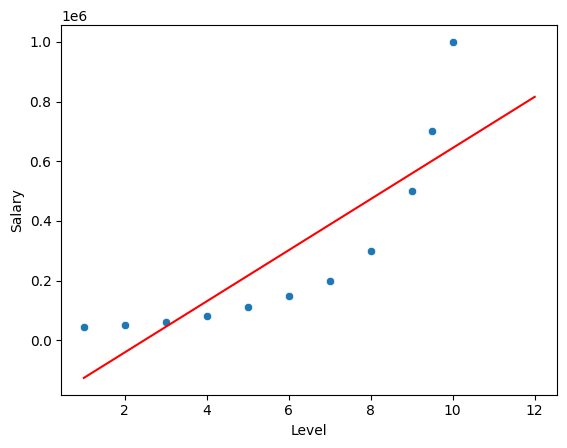

In [29]:
sns.scatterplot(x='Level', y='Salary', data=income2_df)
x = np.linspace(1, 12, 20)
y = income2_model_linear.coef_[0]*x + income2_model_linear.intercept_
y_ = income2_model_linear.coef_[0]*income2_df['Level'] + income2_model_linear.intercept_

residuals = (y_ - income2_df['Salary'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

plt.plot(x,y, label=f'y= {income_model.intercept_} + {income_model.coef_[0]}x', color='red')

plt.show()

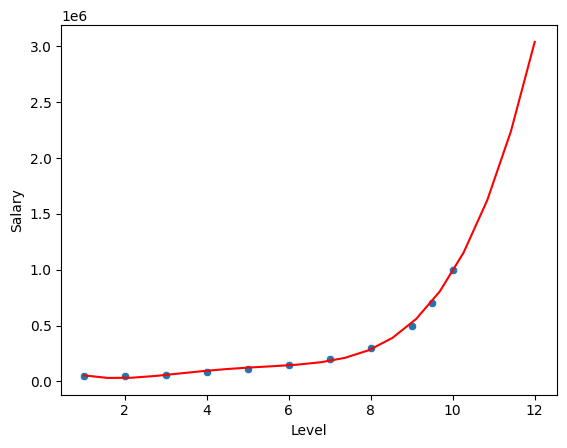

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4)
poly_X = poly.fit_transform(income2_df[['Level']])

income2_model = LinearRegression()
income2_model.fit(poly_X, income2_df['Salary'])

sns.scatterplot(x='Level', y='Salary', data=income2_df)

x = np.linspace(1, 12, 20)
y = income2_model.predict(poly.fit_transform(x.reshape(-1,1)))

plt.plot(x,y, label=f'y= {income_model.intercept_} + {income_model.coef_[0]}x', color='red')

plt.show()

# Multiple Polynomial Regression

In [31]:
# same code from before

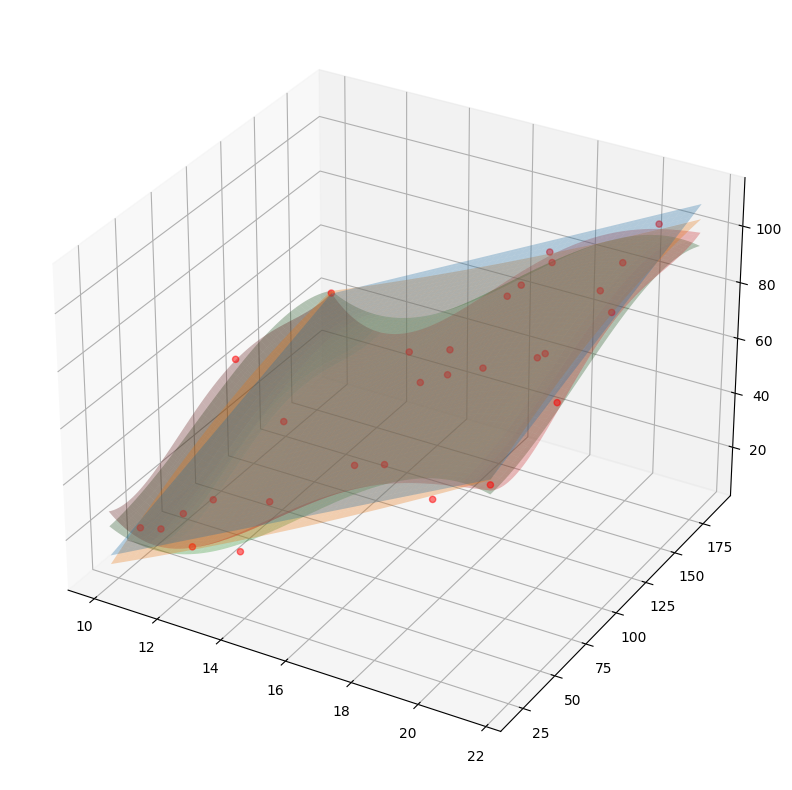

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'],income_df['Seniority'],income_df['Income'],c='red', marker='o', alpha=0.5)

for degree in [1,2,3,4]:
  model = make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression()
  )
  model.fit(income_df[['Education', 'Seniority']], income_df['Income'])

  predictedSurface = model.predict(surfaceX)
  ax.plot_surface(x_surf, y_surf, predictedSurface.reshape(x_surf.shape), alpha=0.3)